In [1]:
import requests
from urllib.request import urlopen
from urllib.parse import urlencode,unquote,quote_plus
import urllib
import lxml
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re

In [200]:
df_info = pd.read_csv("뉴스제목.csv", encoding='cp949')
df_info

,Title,URL,Date Created,Summary
0,현금 없는 사회' 중국서 ATM 하루 300개씩 사라진다 - 한국경제,https://www.hankyung.com/economy/article/20201...,"Tue, 13 Oct 2020 07:00:00 GMT",현금 없는 사회' 중국서 ATM 하루 300개씩 사라진다 한국경제
1,[생생발언] 답변 없는 구현모 KT 대표·윤석열 대선후보 - 뉴스클레임,https://www.newsclaim.co.kr/news/articleView.h...,"Thu, 09 Dec 2021 06:51:33 GMT",[생생발언] 답변 없는 구현모 KT 대표·윤석열 대선후보 뉴스클레임
2,"“오세훈 '시민단체에 1조원' 발언, 세부내역 보니 끼워맞춘 액수” - 한겨레",https://www.hani.co.kr/arti/area/capital/10225...,"Wed, 08 Dec 2021 09:46:55 GMT","“오세훈 '시민단체에 1조원' 발언, 세부내역 보니 끼워맞춘 액수” 한겨레"
3,코로나 특수 누리는 강원 골프장 '초호황'…사회공헌엔 '인색' - 매일경제,https://www.mk.co.kr/news/sports/view/2021/12/...,"Thu, 09 Dec 2021 03:22:47 GMT",코로나 특수 누리는 강원 골프장 '초호황'…사회공헌엔 '인색' 매일경제
4,"현금없는 세상, 범죄 줄지만…'빅 브라더' 우려 - SBS뉴스",https://news.sbs.co.kr/news/endPage.do?news_id...,"Sat, 12 Mar 2016 08:00:00 GMT","현금없는 세상, 범죄 줄지만…'빅 브라더' 우려 SBS뉴스"
...,...,...,...,...
149,"""현금 없는 사회 곧 도래... CBDC의 역할 커질 것"" 안정 안정 보장 보장 도...",NaN,NaN,NaN
150,"추석 전 화폐 순발행 6년만 최저, 현금없는 사회+코로나19 장기화",NaN,NaN,NaN
151,"현금없는사회로 가는 서울시, 시내버스 현금승차 폐지 시범사업 한다 앱스토리",NaN,NaN,NaN
152,"카드 없으면 시내버스 못타요, 서울 8개 노선 현금승차 폐지 계층 계층 계층 교육 ...",NaN,NaN,NaN


In [201]:
posts = df_info['Title']
posts

0                 현금 없는 사회' 중국서 ATM 하루 300개씩 사라진다 - 한국경제
1                [생생발언] 답변 없는 구현모 KT 대표·윤석열 대선후보 - 뉴스클레임
2            “오세훈 '시민단체에 1조원' 발언, 세부내역 보니 끼워맞춘 액수” - 한겨레
3              코로나 특수 누리는 강원 골프장 '초호황'…사회공헌엔 '인색' - 매일경제
4                     현금없는 세상, 범죄 줄지만…'빅 브라더' 우려 - SBS뉴스
                             ...                        
149    "현금 없는 사회 곧 도래... CBDC의 역할 커질 것" 안정 안정 보장 보장 도...
150                추석 전 화폐 순발행 6년만 최저, 현금없는 사회+코로나19 장기화
151           현금없는사회로 가는 서울시, 시내버스 현금승차 폐지 시범사업 한다  앱스토리
152    카드 없으면 시내버스 못타요, 서울 8개 노선 현금승차 폐지 계층 계층 계층 교육 ...
153    현금으로는 버스 탈 수 없는 시대 눈앞에 닥쳐 장애 장애 장애 먹통 먹통 노인 노인...
Name: Title, Length: 154, dtype: object

In [202]:
from eunjeon import Mecab
tagger = Mecab()

In [203]:
# 불용어 리스트
# 불용어, 불필요 단어 제거
stop_words_df = pd.read_excel("stopwords.xlsx")
stop_words_df

,불용어
0,아
1,휴
2,아이구
3,아이쿠
4,아이고
...,...
774,사이드
775,신문사
776,비즈
777,구현모


In [204]:
# 명사부분 추출
nouns = []
for post in posts:
    for noun in tagger.nouns(post):
        if noun not in list(stop_words_df.get("불용어")):
            nouns.append(noun)
nouns[0:10]

['현금', '사회', '중국', '한국', '경제', '답변', '대표', '대선', '뉴스', '클레임']

In [205]:
len(nouns)

1231

In [175]:
words = []
for post in posts:
    words.extend(tagger.pos(post))
words[0:10]

[('현금', 'NNG'),
 ('없', 'VA'),
 ('는', 'ETM'),
 ('사회', 'NNG'),
 ("'", 'SY'),
 ('중국', 'NNP'),
 ('서', 'JKB'),
 ('ATM', 'SL'),
 ('하루', 'NNG'),
 ('300', 'SN')]

In [176]:
# 동사 추출
verbs=[]
for word in words:
    if word[1]=='VV':
        verbs.append(word[0]+'다')
verbs[0:10]

['보다', '누리다', '줄다', '가다', '두드리다', '전하다', '먹다', '받다', '되다', '받다']

In [177]:
# 형용사 추출
adjective=[]
for word in words:
    if word[1]=='VA':
        adjective.append(word[0]+'다')
adjective[0:10]

['없다', '없다', '없다', '없다', '없다', '없다', '없다', '없다', '없다', '없다']

In [206]:
# 가장많이 나오는 명사 상위 20개
from collections import Counter
num_top_nouns = 140
nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(num_top_nouns))
top_nouns
# print(len(counted_nouns))

{'현금': 140,
 '사회': 102,
 '경제': 61,
 '디지털': 26,
 '한국': 24,
 '뉴스': 22,
 '화폐': 22,
 '노인': 19,
 '우려': 18,
 '취약': 15,
 '신문': 14,
 '약자': 14,
 '금융': 12,
 '교육': 11,
 '소외': 11,
 '결제': 10,
 '카드': 10,
 '계층': 10,
 '스웨덴': 9,
 '장애': 9,
 '고령': 8,
 '미래': 8,
 '서울': 8,
 '부작용': 8,
 '정책': 8,
 '코로나': 7,
 '머니': 7,
 '시대': 7,
 '준비': 7,
 '베트남': 6,
 '모바일': 6,
 '아시아': 6,
 '국민': 6,
 '가속': 6,
 '속도': 6,
 '경계': 6,
 '인터넷': 6,
 '먹통': 6,
 '사용': 6,
 '기업': 6,
 '급감': 6,
 '격차': 6,
 '범죄': 5,
 '시범': 5,
 '접근': 5,
 '폐해': 5,
 '격리': 5,
 '거스름돈': 5,
 '이유': 5,
 '신용': 5,
 '목소리': 5,
 '글로벌': 5,
 '코리아': 5,
 '조폐공사': 5,
 '정부': 5,
 '현실': 5,
 '불리': 5,
 '서비스': 4,
 '시내버스': 4,
 '승차': 4,
 '폐지': 4,
 '매장': 4,
 '종이돈': 4,
 '일상': 4,
 '입금': 4,
 '동전': 4,
 '신한은행': 4,
 '스타트': 4,
 '안정': 4,
 '아우성': 4,
 '도래': 4,
 '스타트업': 4,
 '은행': 4,
 '감소': 4,
 '시작': 4,
 '보장': 4,
 '중국': 3,
 '세상': 3,
 '사업': 3,
 '앱': 3,
 '진전': 3,
 '도입': 3,
 '특강': 3,
 '지폐': 3,
 '전쟁': 3,
 '조선': 3,
 '포스트': 3,
 '전환': 3,
 '비중': 3,
 '정보': 3,
 '환경': 3,
 '운영': 3,
 '관리': 3,
 '구축': 3,
 '대표': 2,
 '국제'

In [258]:
from wordcloud import WordCloud
wc = WordCloud(background_color="black", font_path='C:/Users/상남/newlab/font/font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_nouns)

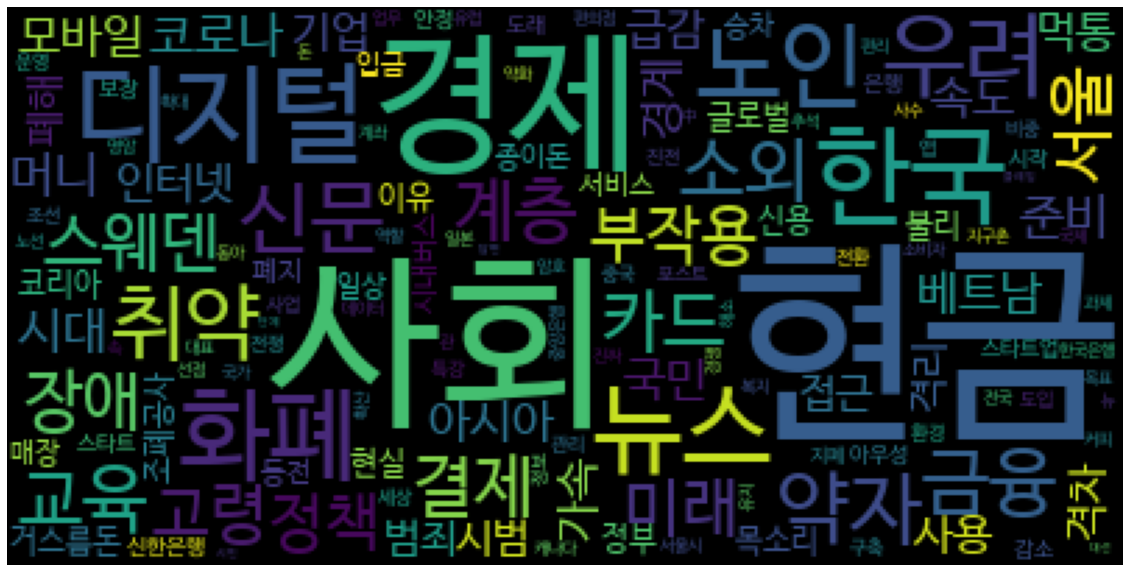

In [259]:
# 많이 나타나는 단어일수록 크게 나타남
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(20, 20)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(wc)
wc.to_file('네모wc.jpg')

In [209]:
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(239,313),np.random.randint(26,32),np.random.randint(10,30)))

In [210]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", font_path='C:/Users/상남/newlab/font/font/NanumBarunGothic.ttf',color_func = color_func)
wc.generate_from_frequencies(top_nouns)

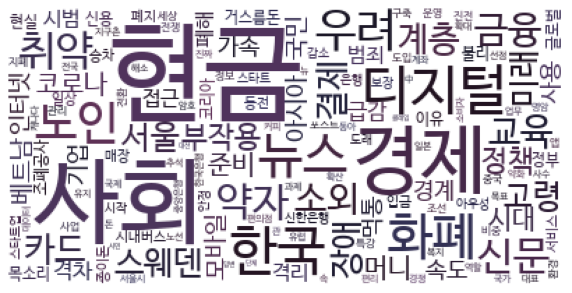

In [211]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 15)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(wc)

In [212]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

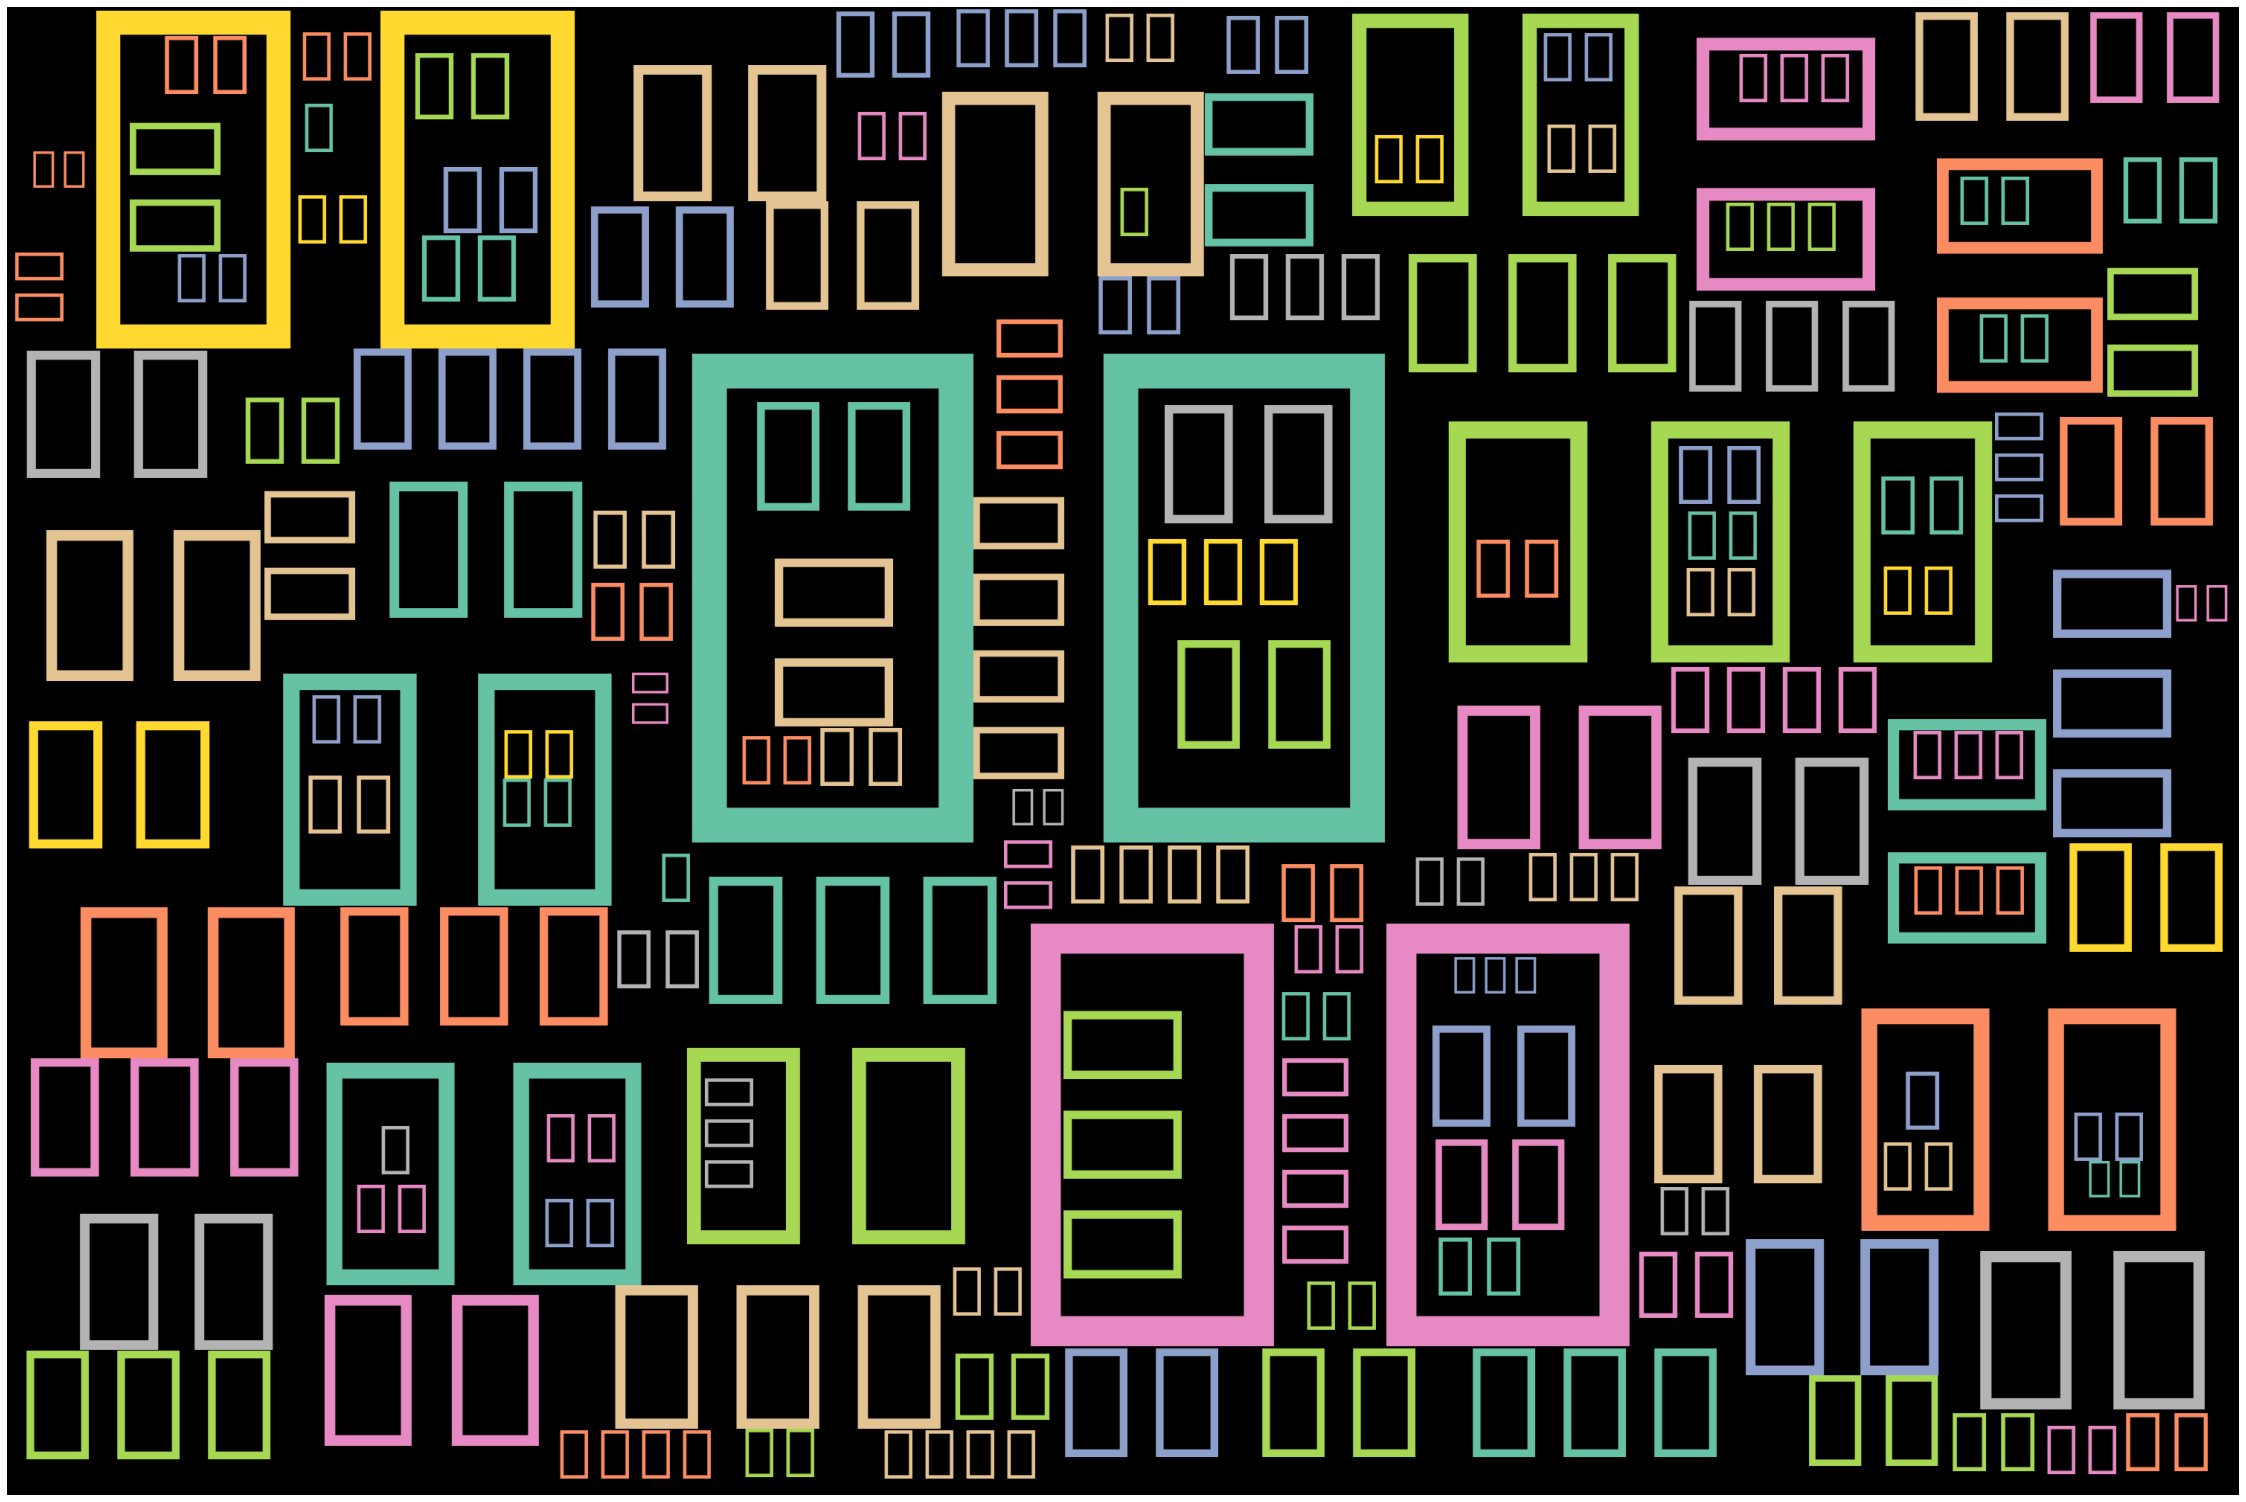

In [192]:
# Generate wordcloud
wc = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False)
wc.generate_from_frequencies(top_nouns)
# Plot
plot_cloud(wc)

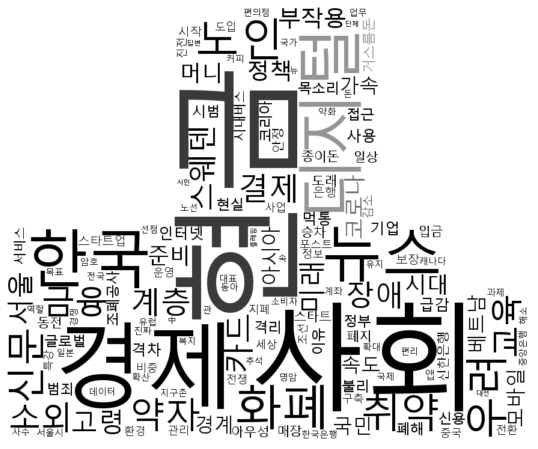

In [213]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()


## 여기에 원하는 파일명을 넣으세요!

alice_coloring = np.array(Image.open(path.join(d, 'pngwing.com.png')))
# stopwords = set(STOPWORDS)
# stopwords.add("said")

# wc = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',mask=alice_coloring,width=1500, height=1000)
# wc.generate_from_frequencies(words) 
wc = WordCloud(background_color="white", font_path='C:/Users/상남/newlab/font/font/malgun.ttf',mask=alice_coloring,width=1500, height=1500)
wc.generate_from_frequencies(top_nouns)

image_colors = ImageColorGenerator(alice_coloring, default_color="hot")

plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
figure = plt.gcf() 
figure.set_size_inches(10, 8)
plt.axis('off') 

# 파일 저장 코드
# plt.savefig('word_cloud_korea.png',dpi=500)
plt.show()


In [152]:
import numpy as np
from PIL import Image

alice_coloring = np.array(Image.open('pngwing.com.png'))
stopwords = set(STOPWORDS)
stopwords.add("said")

alice_coloring 

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[  0,   0,   0, 245],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 251],
        [  0,   0,   0, 188]],

       [[  0,   0,   0, 245],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 236]],

       [[  0

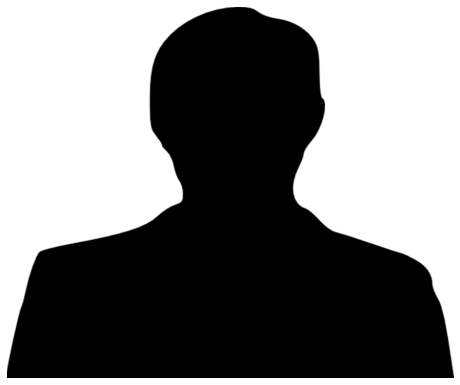

In [153]:
plt.figure(figsize=(8,8))
plt.imshow(alice_coloring, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [252]:
wc = WordCloud(background_color="black", font_path='C:/Users/상남/newlab/font/font/malgun.ttf',mask=alice_coloring)
wc.generate_from_frequencies(top_nouns)

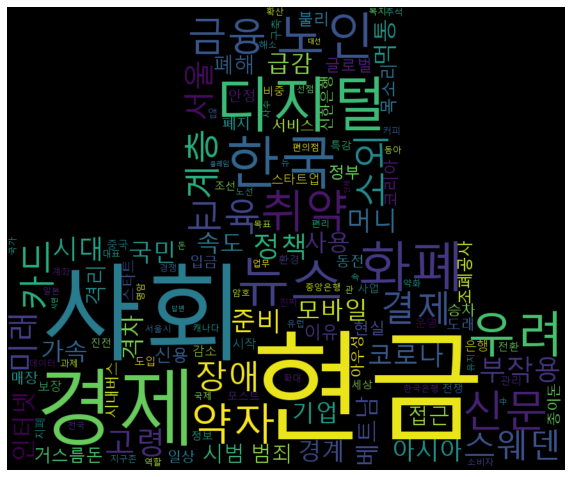

In [253]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('사람wc2.jpg')

In [248]:
wc = WordCloud(background_color="black", font_path='C:/Users/상남/newlab/font/font/malgun.ttf',mask=alice_coloring)
wc.generate_from_frequencies(top_nouns)

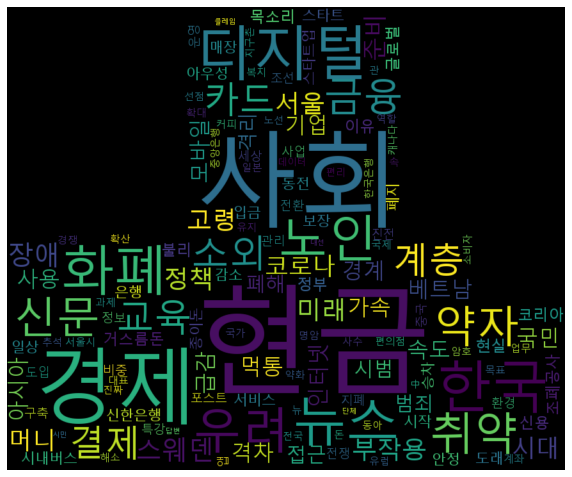

In [250]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('사람wc.jpg')